In [1]:
"""
Comparing thermoclien depth profiles in different regiosn to get the best method
First load in data
Next get regions of the data
then begin to plot
a. annual climatology
b. monthly climatology
c. pick some dates thoughout year and look at them

Regions to get:
SETIO
WTIO
SCTR
Equator
Java
Sumatra

"""

'\nComparing thermoclien depth profiles in different regiosn to get the best method\nFirst load in data\nNext get regions of the data\nthen begin to plot\na. annual climatology\nb. monthly climatology\nc. pick some dates thoughout year and look at them\n\nRegions to get:\nSETIO\nWTIO\nSCTR\nEquator\nJava\nSumatra\n\n'

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [3]:
#now plot climatology
import cartopy.feature as cfeature

def plot_background(ax, i, j):
    #for use with plotting 12 months. need to change 
    ax.set_extent([30., 125., -30., 20.])
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5,)
    gl.top_labels = False
    gl.right_labels = False
    if i == 5:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False
    if j > 0:
        gl.left_labels = False
    return ax
def plot_var_c(vari, vmin, vmax, name, cm):
    lons = vari.lon
    lats = vari.lat
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all', 
                                 subplot_kw={'projection':ccrs.PlateCarree()})
    for i in range(0,6):

        axes[i, 0].pcolormesh(lons, lats, (vari).sel(month = i+1), cmap = cm, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,0], i, 0)
        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        im = axes[i, 1].pcolormesh(lons, lats, (vari).sel(month = i+7), cmap = cm, 
                                    #colorbar=True, 
                                    vmin = vmin, vmax = vmax, 
                                    transform=ccrs.PlateCarree())
        plot_background(axes[i,1], i, 1)
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    cbar_ax = fig.add_axes([0.95, 0.45, 0.05, 0.25])
    fig.colorbar(im, cax=cbar_ax)
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

In [4]:
#laod in ACCESS-CM2 data
#T = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/THETAO_deeper/*.nc').thetao.sel(lat=slice(-40,30),lon=slice(30,125))
#T = T.rename({'lev':'level'})
#M = xr.open_mfdataset('/home/z5113258/Documents/data/CMIP6/ACCESS-CM2/MLOTST/mlotst_Omon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc.nc').mlotst.sel(lat=slice(-40,30),lon=slice(30,125))

In [5]:
T = xr.open_mfdataset('/home/z5113258/Documents/GODAS/deep/remapcon_1/pottmp/*.nc').pottmp.sel(lat=slice(-40,30),lon=slice(30,125))
M = xr.open_mfdataset('/home/z5113258/Documents/GODAS/remapcon_1/dbss_obml/*.nc').dbss_obml.sel(lat=slice(-40,30),lon=slice(30,125))

In [6]:
M.time

<xarray.DataArray 'time' (time: 492)>
array(['1980-01-01T00:00:00.000000000', '1980-02-01T00:00:00.000000000',
       '1980-03-01T00:00:00.000000000', ..., '2020-10-01T00:00:00.000000000',
       '2020-11-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2020-12-01
Attributes:
    standard_name:  time
    long_name:      time
    axis:           T

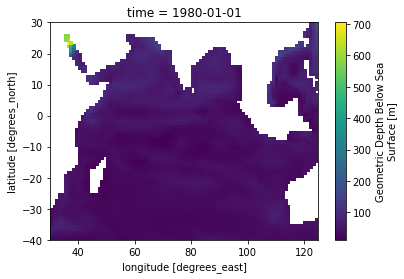

In [7]:
M[0].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


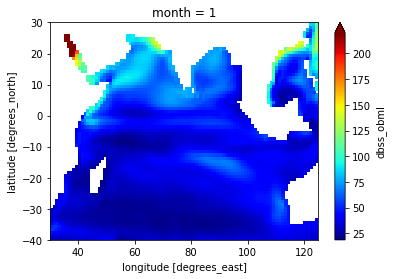

In [7]:
MC = M.groupby('time.month').mean('time')#MLD clim
MC[0].plot(cmap = 'jet', vmax = 220)

In [8]:
TM = T.where(T.level > M, np.nan)

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


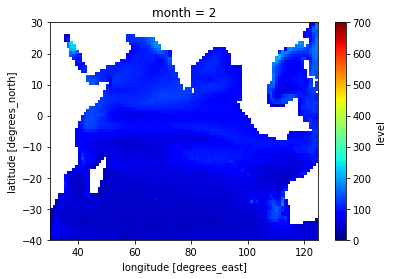

In [10]:
(T.diff('level')/(T.level.diff('level'))).idxmin('level').groupby('time.month').mean('time')[1].plot(vmin = 0, vmax = 700, cmap = 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


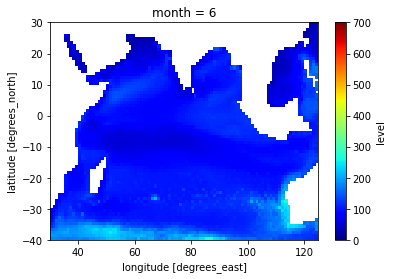

In [11]:
(TM.diff('level')/(TM.level.diff('level'))).idxmin('level').groupby('time.month').mean('time')[5].plot(vmin = 0, vmax = 700, cmap = 'jet')

In [140]:
test = get_region(T, -25, 5, 60, 10)
tp = test
test = (test.diff('level')/(test.level.diff('level')))
#x[argrelextrema(x, np.greater)[0]]

In [20]:
test_t1 = test[0]

In [105]:
from scipy.signal import argrelextrema, argrelmin, find_peaks


In [108]:
a = argrelextrema(test_t1.values, np.less, axis = 0)

In [122]:
b = find_peaks(-1*test)

ValueError: `x` must be a 1-D array

In [120]:
a

(array([ 3,  9, 12, 15]),)

In [121]:
b

(array([ 3,  9, 12, 15]), {})

In [227]:
def return_local_minima(a):
    B = find_peaks(a)
    return B[0]

In [228]:
return_local_minima(-1*test_t1)

array([ 3,  9, 12, 15])

In [152]:
import numpy
c = np.apply_along_axis(find_peaks, 1, -1*test)

/home/z5113258/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [161]:
c

array([[array([ 3,  9, 12, 15]), {}],
       [array([ 3,  9, 12, 15]), {}],
       [array([ 4,  9, 12, 15]), {}],
       [array([ 4, 12, 15]), {}],
       [array([ 1,  7,  9, 12, 15]), {}],
       [array([ 9, 12, 15]), {}],
       [array([ 1, 12, 15, 21]), {}],
       [array([ 2, 12, 15]), {}],
       [array([ 3, 16]), {}],
       [array([ 4,  9, 17]), {}],
       [array([ 3, 12, 18]), {}],
       [array([ 3, 12, 21]), {}],
       [array([ 4, 12, 21]), {}],
       [array([ 4, 12, 22]), {}],
       [array([ 5, 12, 22]), {}],
       [array([ 5, 12, 22]), {}],
       [array([ 6, 12, 15, 22]), {}],
       [array([ 7, 12, 15, 22]), {}],
       [array([ 9, 12, 15, 22]), {}],
       [array([ 2,  9, 11, 15, 22]), {}],
       [array([ 2, 12, 15, 22]), {}],
       [array([ 2,  9, 12, 15, 22]), {}],
       [array([ 2,  9, 12, 15, 22]), {}],
       [array([ 2,  9, 12, 15, 22]), {}],
       [array([ 3, 12, 15, 22]), {}],
       [array([ 4, 12, 15, 22]), {}],
       [array([ 4, 12, 15, 22]), {}],
  

In [199]:
d = []
for i, j  in enumerate(c):
    d.append(j[0][0])
    if i == 0:
        e = test[i][j[0][0]]
    else:
        e = xr.concat([e, test[i][j[0][0]].level], dim = 'time')

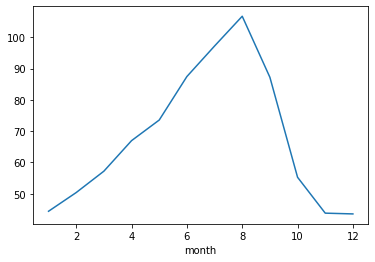

In [202]:
e.groupby('time.month').mean('time').plot()

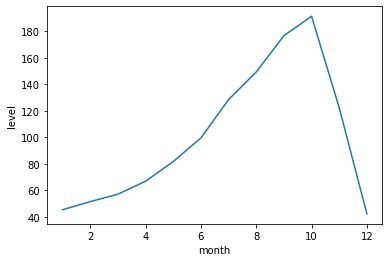

In [203]:
test.idxmin('level').groupby('time.month').mean('time').plot()

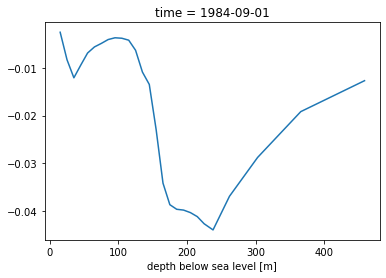

In [139]:
test[56].plot()

In [224]:
c = np.apply_along_axis(return_local_minima, 1, -1*TM)

ValueError: could not broadcast input array from shape (0) into shape (1)

In [211]:
c.shape

(492, 2, 70, 95)

In [212]:
TM.shape


(492, 28, 70, 95)

In [245]:
c[0, 0][:,:][0]

array([array([18]), array([], dtype=int64), array([14, 18]), array([13]),
       array([12]), array([15]), array([10]), array([], dtype=int64),
       array([], dtype=int64), array([18]), array([10, 16]), array([6]),
       array([9]), array([7]), array([18]), array([6]), array([ 6, 19]),
       array([], dtype=int64), array([], dtype=int64), array([22]),
       array([], dtype=int64), array([24]), array([24]),
       array([ 8, 12, 24]), array([8]), array([14]), array([ 7, 10, 24]),
       array([10, 13]), array([13]), array([11, 17, 23]), array([16, 23]),
       array([17]), array([], dtype=int64), array([24]), array([10, 24]),
       array([13, 24]), array([24]), array([], dtype=int64),
       array([11, 14]), array([25]), array([15, 25]), array([12, 25]),
       array([25]), array([12]), array([12, 15]), array([19]),
       array([], dtype=int64), array([17, 25]), array([25]),
       array([22, 25]), array([25]), array([25]), array([22, 25]),
       array([ 6, 25]), array([10, 25])

In [12]:
#creaet varibales for TC_T and TC_Tbelow mixed layer climatology
TC = (T.diff('level')/(T.level.diff('level'))).idxmin('level').groupby('time.month').mean('time')
TCM = (TM.diff('level')/(TM.level.diff('level'))).idxmin('level').groupby('time.month').mean('time')

In [13]:
#save cliamtology of T and climatology of dT/dt
T_clim = T.groupby('time.month').mean('time')
dT_clim = (T.diff('level')/(T.level.diff('level'))).groupby('time.month').mean('time')

In [14]:
#save datsets to disk
TCM.to_netcdf('/home/z5113258/Documents/GODAS/remapcon_1/climatology/TC_ML.nc')
TC.to_netcdf('/home/z5113258/Documents/GODAS/remapcon_1/climatology/TC_.nc')
T_clim.to_netcdf('/home/z5113258/Documents/GODAS/remapcon_1/climatology/Tclim.nc')
dT_clim.to_netcdf('/home/z5113258/Documents/GODAS/remapcon_1/climatology/dTclim.nc')


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


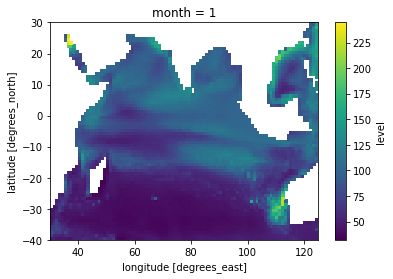

In [29]:
TC[0].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


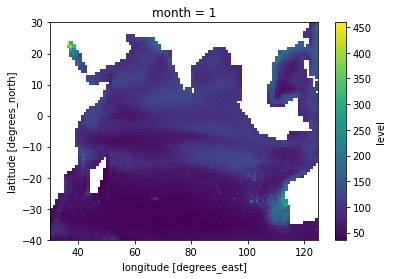

In [30]:
TCM[0].plot()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

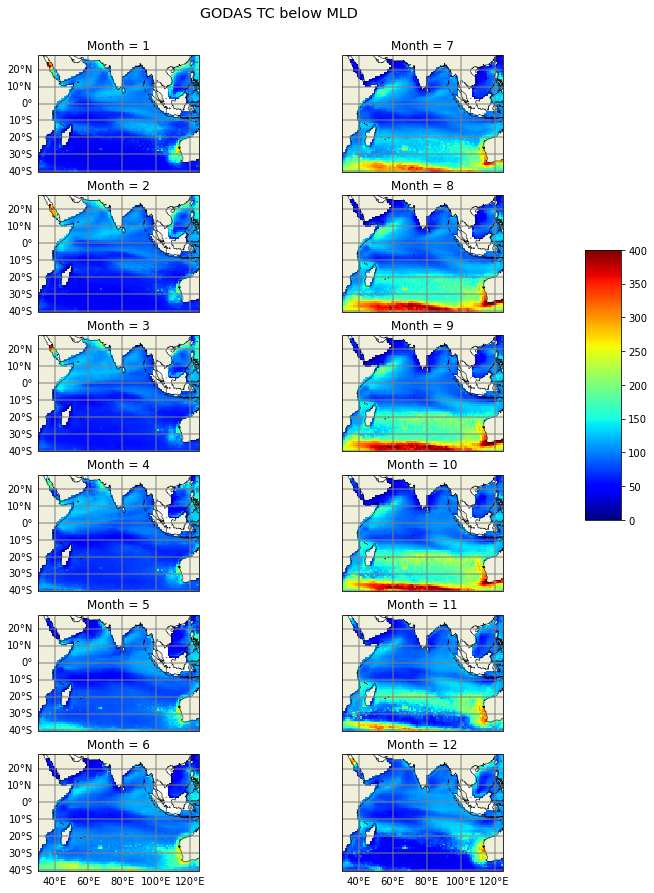

In [15]:
a = plot_var_c(TCM, 0, 400, 'GODAS TC below MLD', 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

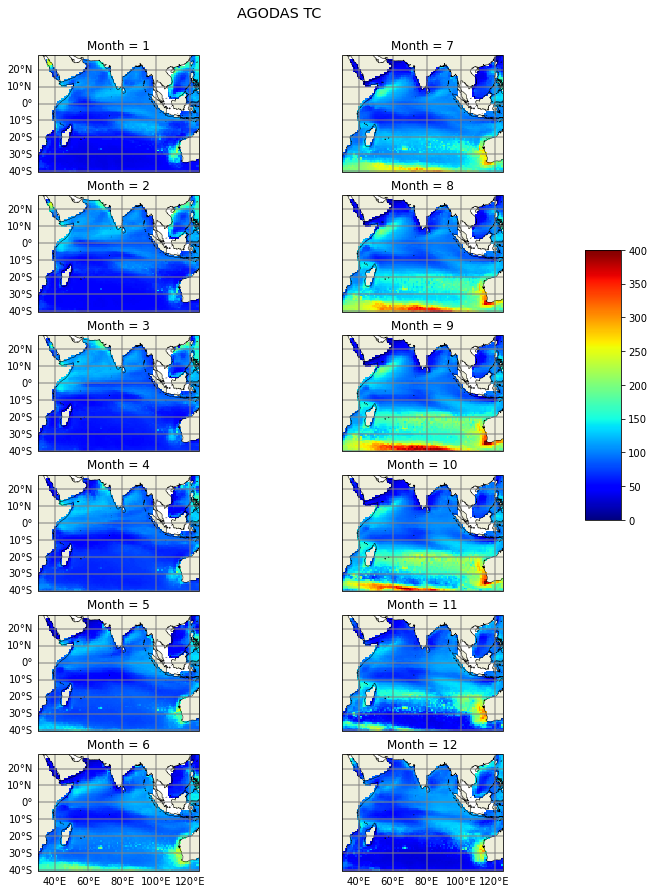

In [32]:
a = plot_var_c(TC, 0, 400, 'GODAS TC', 'jet')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

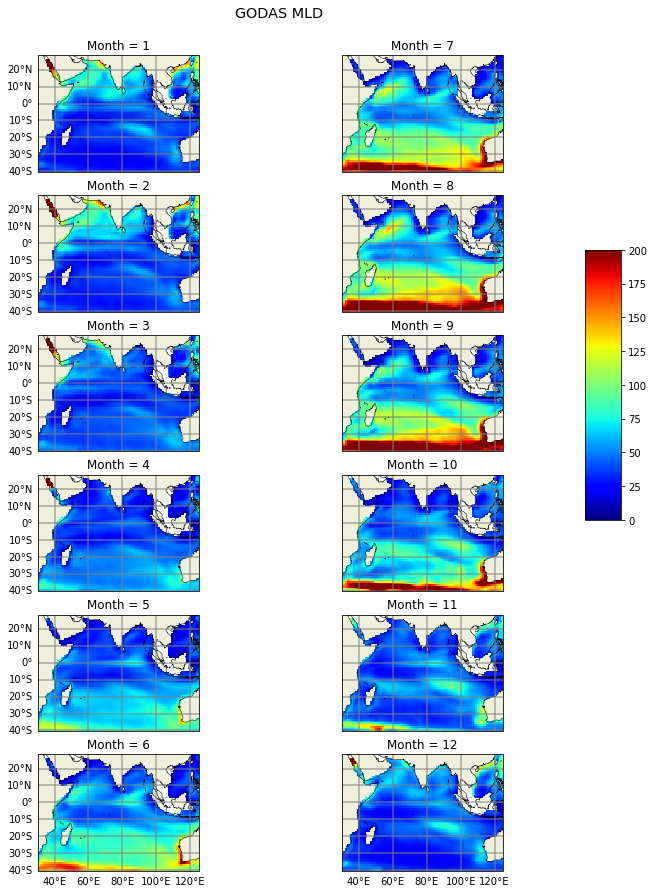

In [33]:
a = plot_var_c(MC, 0, 200, 'GODAS MLD', 'jet')

In [16]:
#getting line plots for T and TM, witht he MLD and TC depth plotted laterally
def get_region(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean(['lat', 'lon'])
    return setio
def get_region_trans(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean('lat')
    return setio

SETIO_T = get_region(T, -10, 10, 90, 20)
WTIO_T = get_region(T, -10, 20, 50, 20)
SCTR_T = get_region(T, -12, 7, 55, 10)#55°E–65°E, 5°S–12°S
SSUM_T = get_region(T, -10,5,100,7)
NSUM_T = get_region(T, 0,5,95,5)
EQA_T = get_region(T, -5,5,50,30)
SIO_T = get_region(T, -25, 5, 50, 30)

SETIO_C = get_region(TC, -10, 10, 90, 20)
WTIO_C = get_region(TC, -10, 20, 50, 20)
SCTR_C = get_region(TC, -12, 7, 55, 10)#55°E–65°E, 5°S–12°S
SSUM_C = get_region(TC, -10,5,100,7)
NSUM_C = get_region(TC, 0,5,95,5)
EQA_C = get_region(TC, -5,5,50,30)
SIO_C = get_region(TC, -18, 1, 53, 1)

SETIO_CM = get_region(TCM, -10, 10, 90, 20)
WTIO_CM = get_region(TCM, -10, 20, 50, 20)
SCTR_CM = get_region(TCM, -12, 7, 55, 10)#55°E–65°E, 5°S–12°S
SSUM_CM = get_region(TCM, -10,5,100,7)
NSUM_CM = get_region(TCM, 0,5,95,5)
EQA_CM = get_region(TCM, -5,5,50,30)
SIO_CM = get_region(TCM, -18, 1, 53, 1)

In [17]:
#load datasets to memeory
T_clim.load()
dT_clim.load()
TCM.load()
MC.load()
TC.load()

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'level' (month: 12, lat: 70, lon: 95)>
array([[[ 46.463413,  51.341465,  44.02439 , ...,  47.92683 ,
          47.439026,  47.439026],
        [ 72.31707 ,  55.      ,  55.243904, ...,  48.414635,
          48.658535,  48.658535],
        [ 82.80488 ,  72.560974,  66.70731 , ...,  49.390244,
          48.658535,  49.878048],
        ...,
        [       nan,        nan,        nan, ..., 107.439026,
         137.92683 , 145.      ],
        [       nan,        nan,        nan, ...,  87.68293 ,
         129.14635 , 168.36586 ],
        [       nan,        nan,        nan, ...,  93.29269 ,
          88.414635, 154.51219 ]],

       [[ 56.951218,  57.19512 ,  55.      , ...,  56.219513,
          55.243904,  54.512196],
        [ 81.097565,  67.439026,  69.63415 , ...,  55.      ,
          56.463413,  56.219513],
        [ 85.97561 ,  79.87805 ,  75.      , ...,  57.92683 ,
          58.90244 ,  58.658535],
...
        [       nan,        nan,        nan, ...,  66.21951 ,
          84.268295,  95.731705],
        [       nan,        nan,        nan, ...,  74.268295,
          78.17073 ,  89.39024 ],
        [       nan,        nan,        nan, ...,  83.53658 ,
          75.731705,  82.80488 ]],

       [[ 57.92683 ,  63.048782,  51.09756 , ...,  45.243904,
          44.26829 ,  44.26829 ],
        [ 85.97561 ,  82.31707 ,  69.63415 , ...,  49.707317,
          45.243904,  45.      ],
        [101.34146 ,  92.31707 ,  88.902435, ...,  49.951218,
          45.97561 ,  54.82927 ],
        ...,
        [       nan,        nan,        nan, ...,  84.02439 ,
         119.63415 , 125.731705],
        [       nan,        nan,        nan, ...,  87.439026,
         102.80488 , 125.80488 ],
        [       nan,        nan,        nan, ...,  94.756096,
          87.439026, 109.63415 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 30.5 31.5 32.5 33.5 34.5 ... 121.5 122.5 123.5 124.5
  * lat      (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 ... 26.5 27.5 28.5 29.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [18]:
def plot_t_prof(TEMP, TC, MLD, lat, lat_r, lon, lon_r, name):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all')
    T_R = get_region(TEMP, lat, lat_r, lon, lon_r)
    T_C = get_region(-1*TC, lat, lat_r, lon, lon_r)
    T_M = get_region(-1*MLD, lat, lat_r, lon, lon_r)
    for i in range(0,6):

        axes[i, 0].plot(T_R[i], (-1*T_R.level), c= 'tab:blue')
        axes[i, 0].axhline(y = T_C[i], c = 'tab:orange')
        axes[i, 0].axhline(y = T_M[i], c = 'tab:green')     

        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        axes[i, 1].plot(T_R[i+6], (-1*T_R.level))
        axes[i, 1].axhline(y = T_C[i+6], c = 'tab:orange')
        axes[i, 1].axhline(y = T_M[i+6], c = 'tab:green')  
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    
    axes[0,0].text(1.5,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

In [25]:
#fucntion to plot visual T prodile
def plot_t_prof_trans(TEMP, TC, MLD, lat, lat_r, lon, lon_r, name):
    fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 15), sharey='all', sharex='all')
    T_R = get_region_trans(TEMP, lat, lat_r, lon, lon_r)
    T_C = get_region_trans(-1*TC, lat, lat_r, lon, lon_r)
    T_M = get_region_trans(-1*MLD, lat, lat_r, lon, lon_r)
    for i in range(0,6):

        axes[i, 0].pcolormesh(T_R.lon, T_R.level*-1, T_R[i], shading = 'auto')
        axes[i, 0].plot(T_C.lon, T_C[i], c = 'tab:red')
        axes[i, 0].plot(T_M.lon, T_M[i], c = 'tab:orange')     

        mon = i+1
        axes[i, 0].set_title('Month = '+str(mon))
        #2nd collumn
        axes[i, 1].pcolormesh(T_R.lon, T_R.level*-1, T_R[i+6], shading = 'auto')
        axes[i, 1].plot(T_C.lon, T_C[i+6], c = 'tab:red')
        axes[i, 1].plot(T_M.lon, T_M[i+6], c = 'tab:orange')   
        mon2 = i+7
        axes[i, 1].set_title('Month = '+str(mon2))
    
    axes[0,0].text(1,1.3, name, va='bottom', ha='center', fontsize = 'x-large',
            rotation='horizontal', rotation_mode='anchor',
            transform=axes[0,0].transAxes)
    return fig

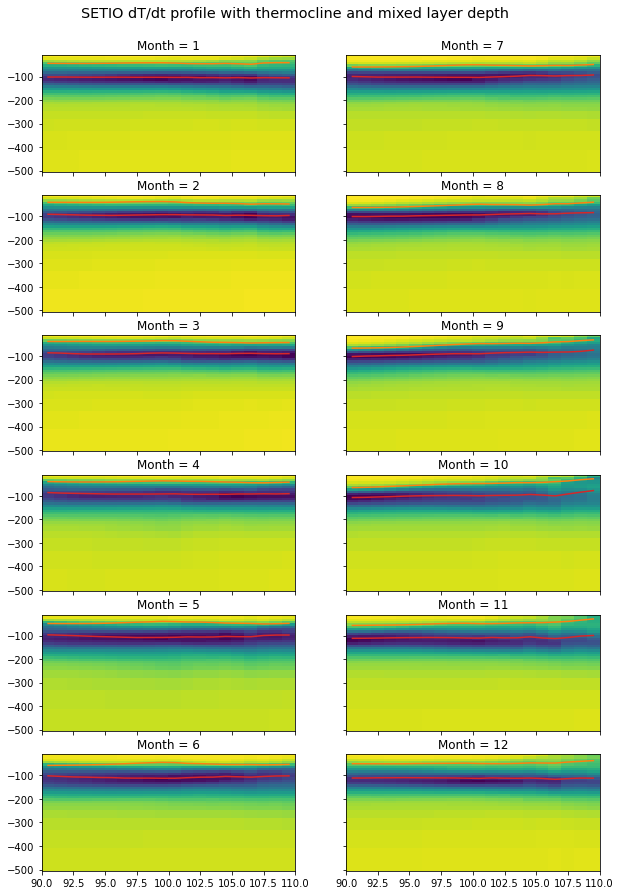

In [26]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -10, 10, 90, 20,  'SETIO dT/dt profile with thermocline and mixed layer depth')

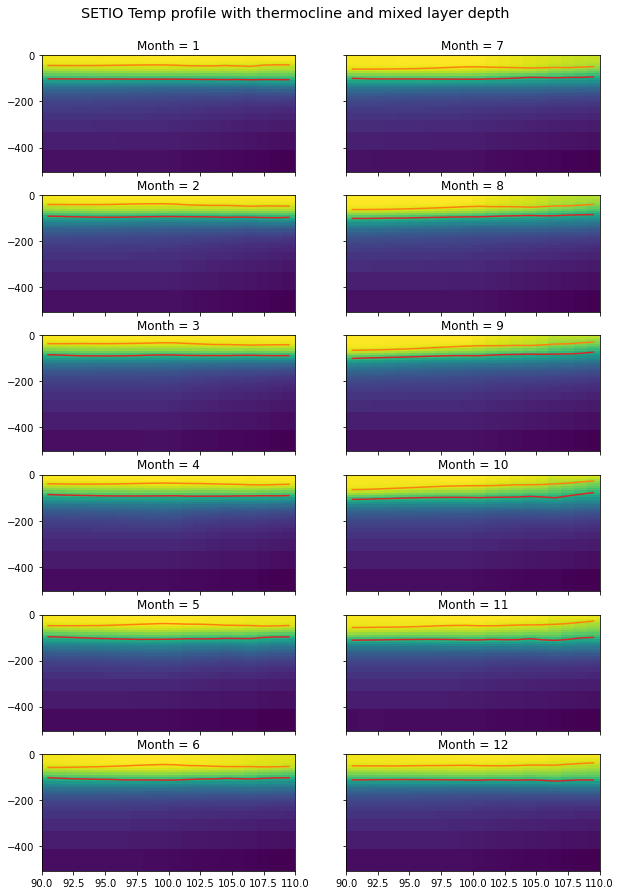

In [27]:
a = plot_t_prof_trans(T_clim, TCM, MC, -10, 10, 90, 20,  'SETIO Temp profile with thermocline and mixed layer depth')

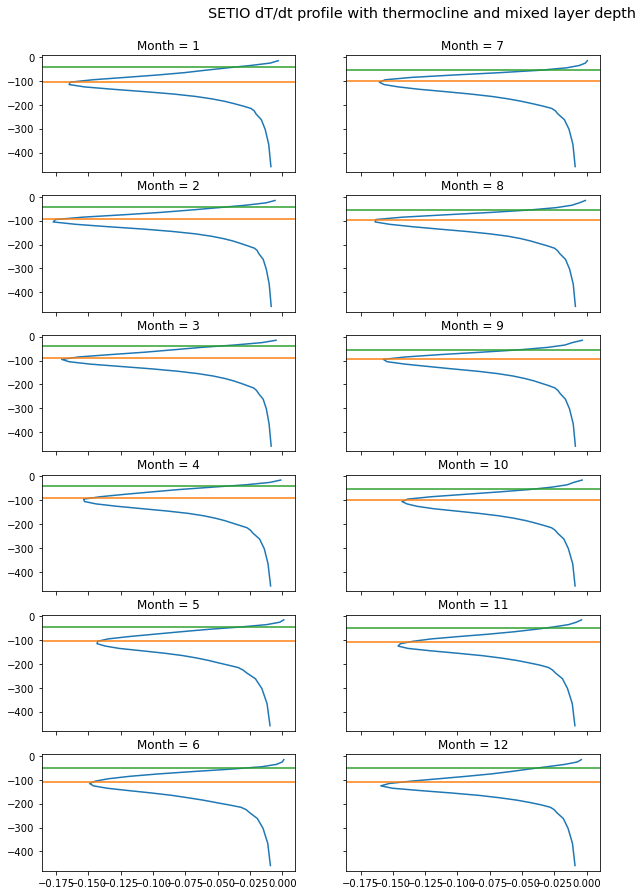

In [22]:
a = plot_t_prof(dT_clim, TCM, MC, -10, 10, 90, 20,  'SETIO dT/dt profile with thermocline and mixed layer depth')

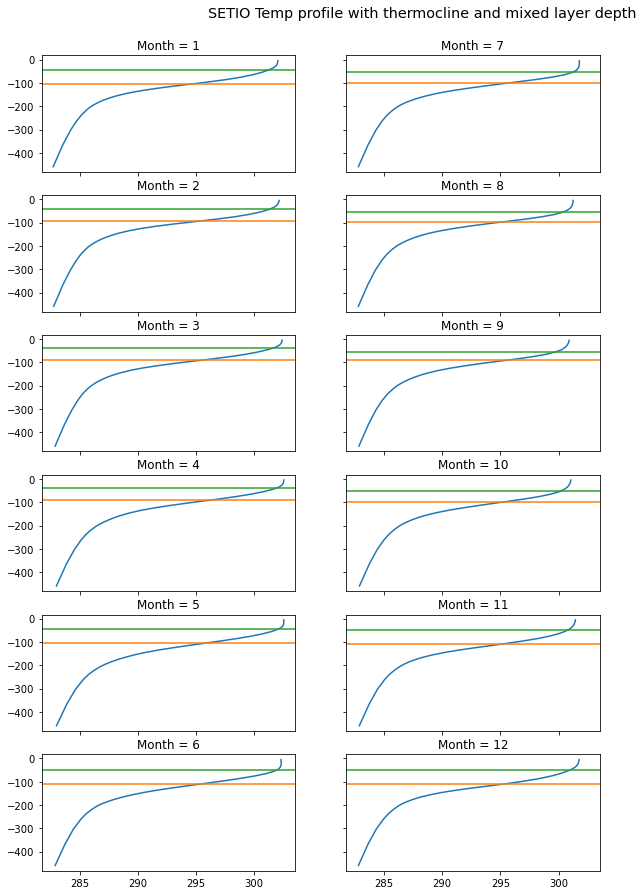

In [24]:
a = plot_t_prof(T_clim, TCM, MC, -10, 10, 90, 20,  'SETIO Temp profile with thermocline and mixed layer depth')

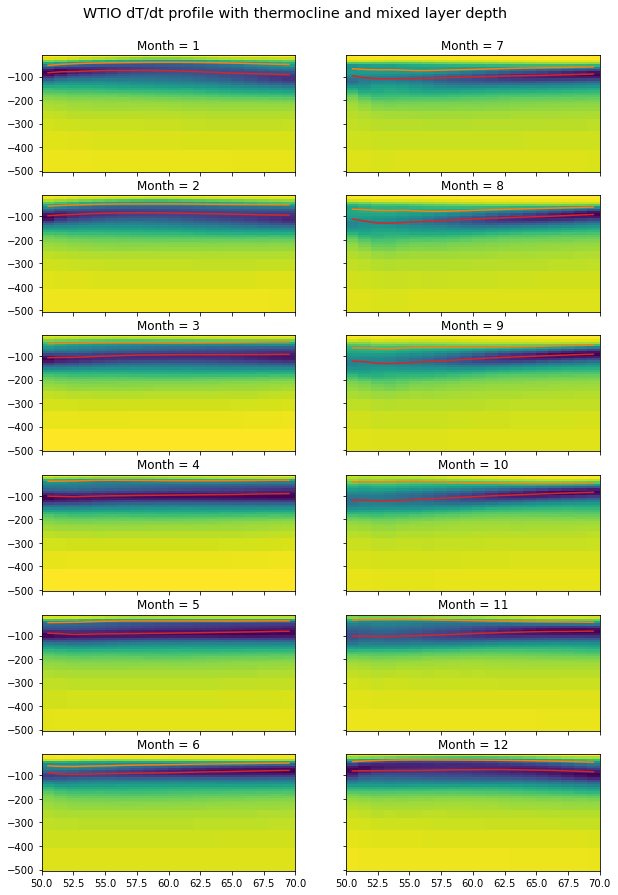

In [39]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -10, 20, 50, 20,  'WTIO dT/dt profile with thermocline and mixed layer depth')

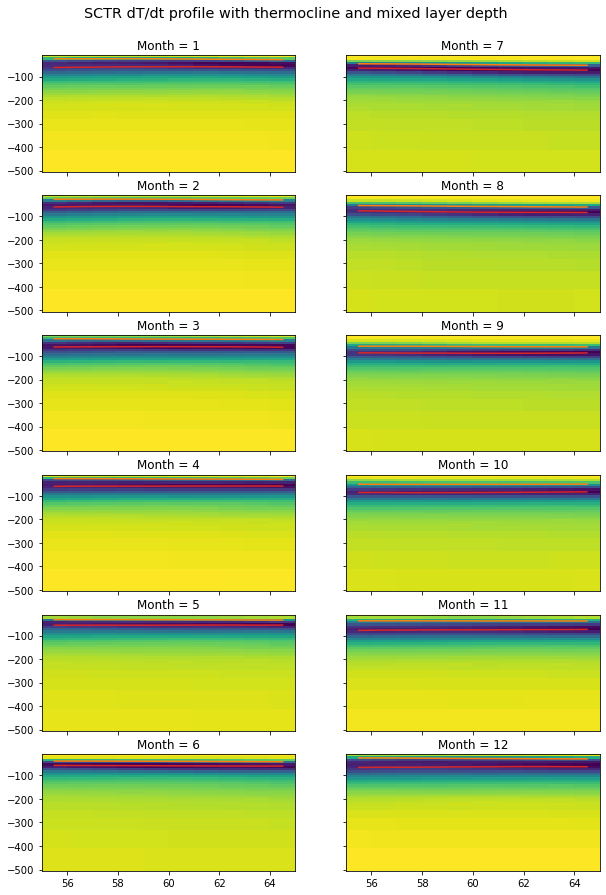

In [40]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -12, 7, 55, 10,  'SCTR dT/dt profile with thermocline and mixed layer depth')

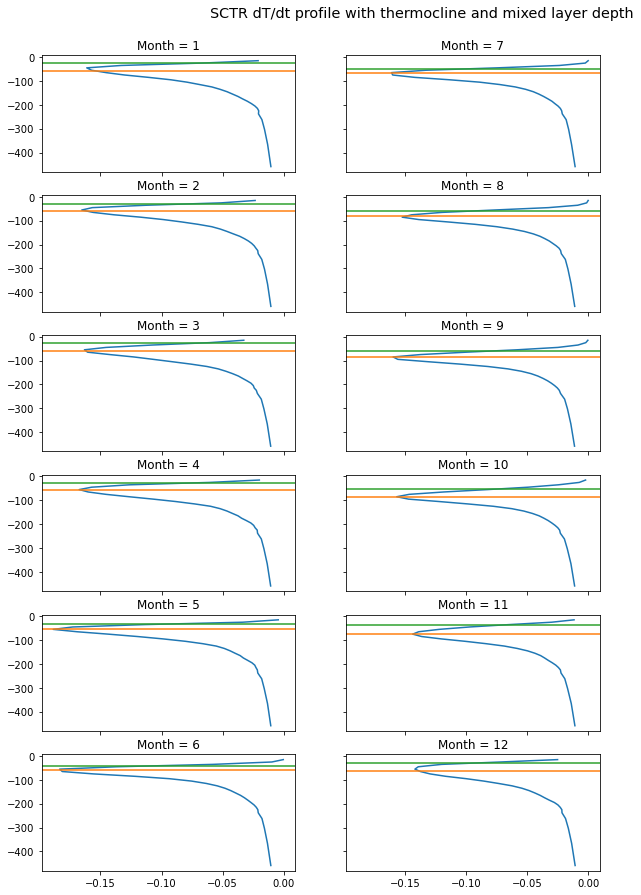

In [28]:
a = plot_t_prof(dT_clim, TCM, MC, -12, 7, 55, 10,  'SCTR dT/dt profile with thermocline and mixed layer depth')

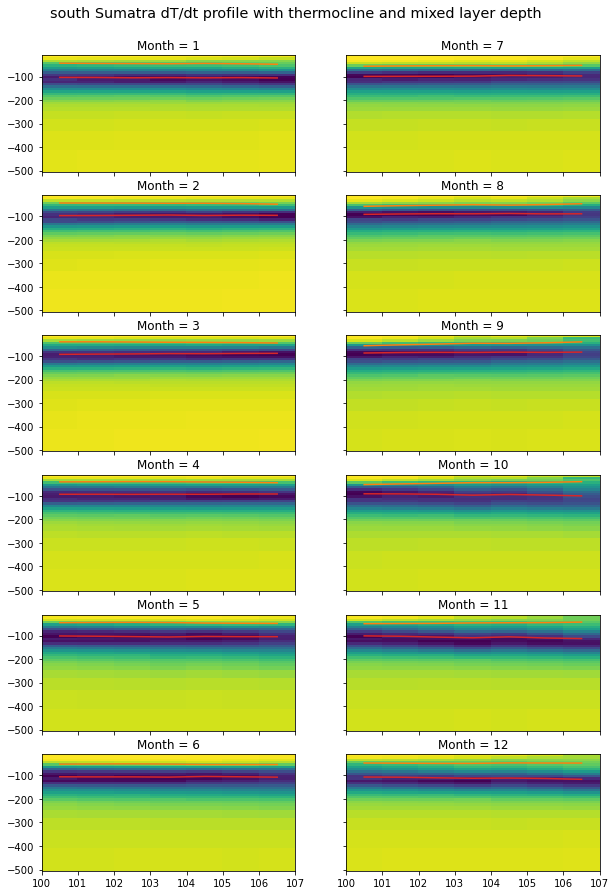

In [41]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -10,5,100,7,  'south Sumatra dT/dt profile with thermocline and mixed layer depth')

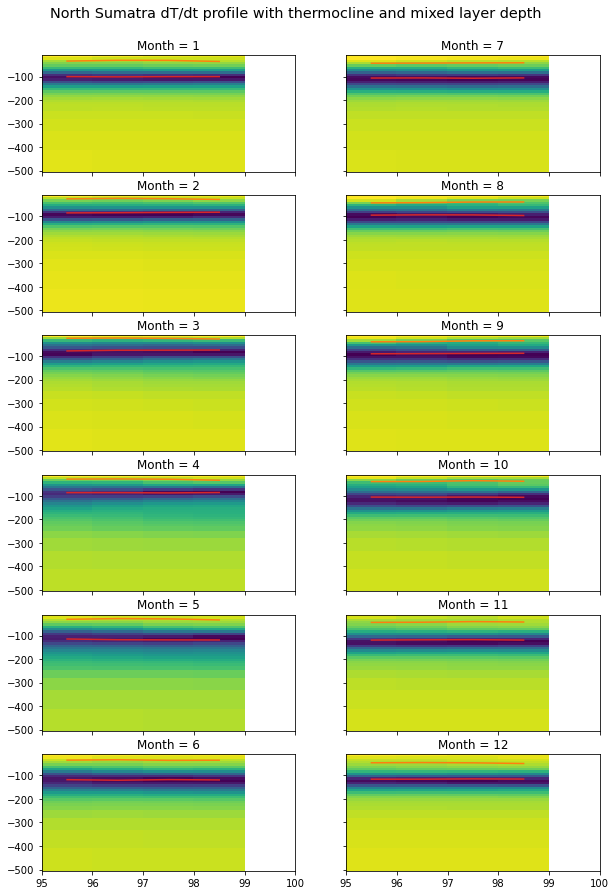

In [42]:
a = plot_t_prof_trans(dT_clim, TCM, MC, 0,5,95,5,  'North Sumatra dT/dt profile with thermocline and mixed layer depth')

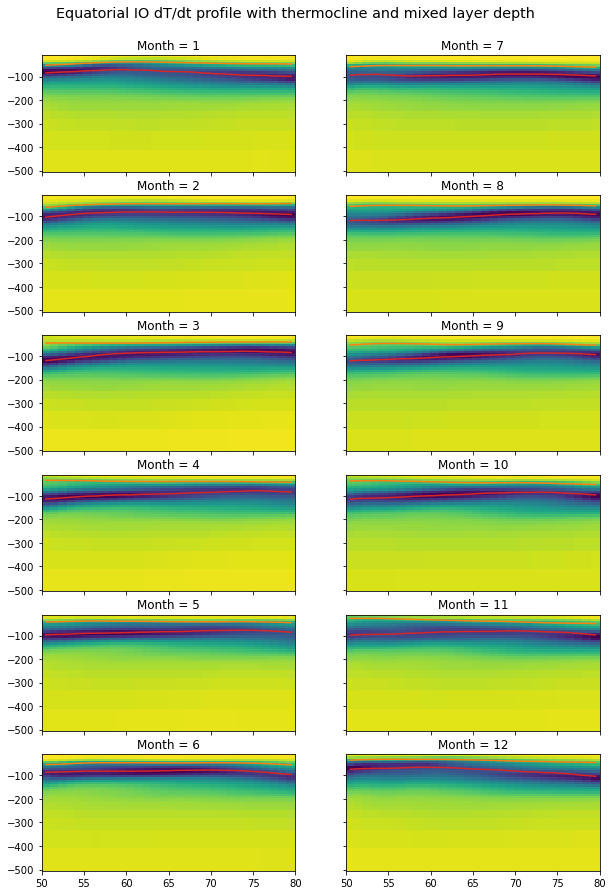

In [43]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -5,5,50,30,  'Equatorial IO dT/dt profile with thermocline and mixed layer depth')

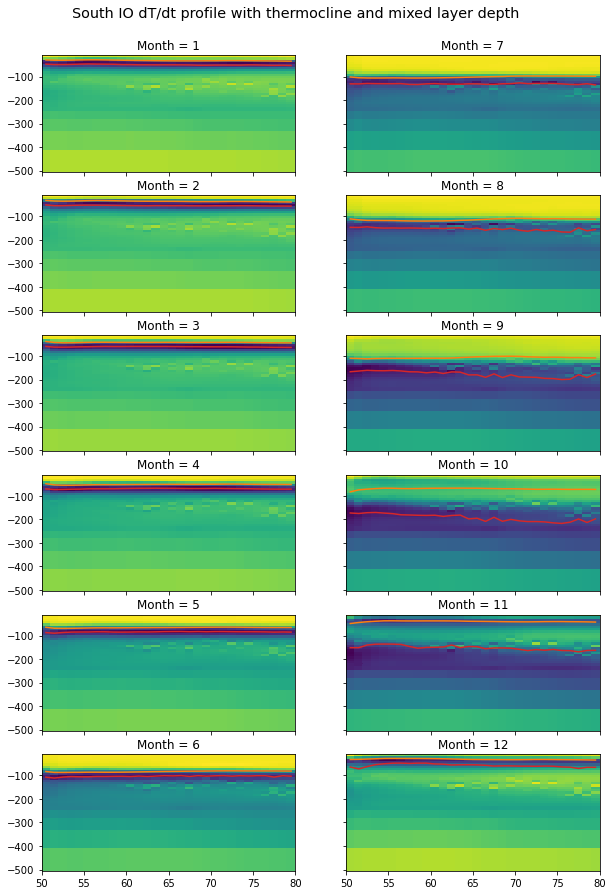

In [44]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -25, 5, 50, 30,  'South IO dT/dt profile with thermocline and mixed layer depth')

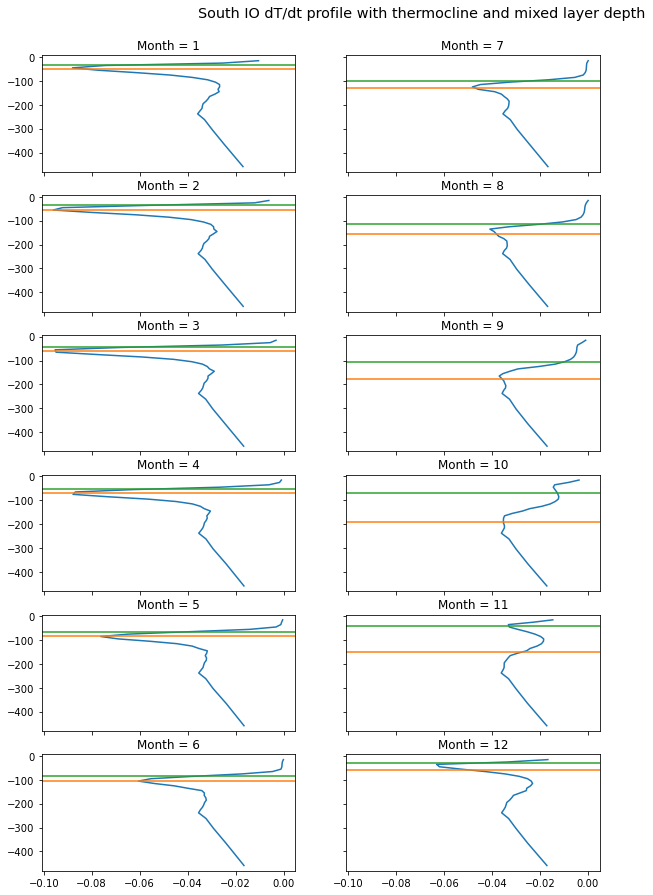

In [45]:
a = plot_t_prof(dT_clim, TCM, MC, -25, 5, 50, 30,  'South IO dT/dt profile with thermocline and mixed layer depth')

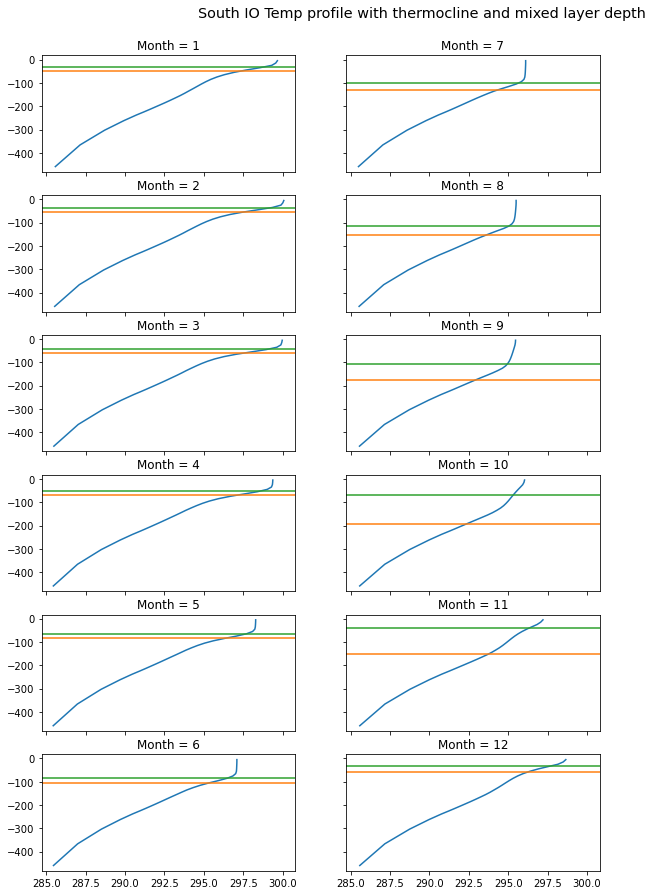

In [46]:
a = plot_t_prof(T_clim, TCM, MC, -25, 5, 50, 30,  'South IO Temp profile with thermocline and mixed layer depth')

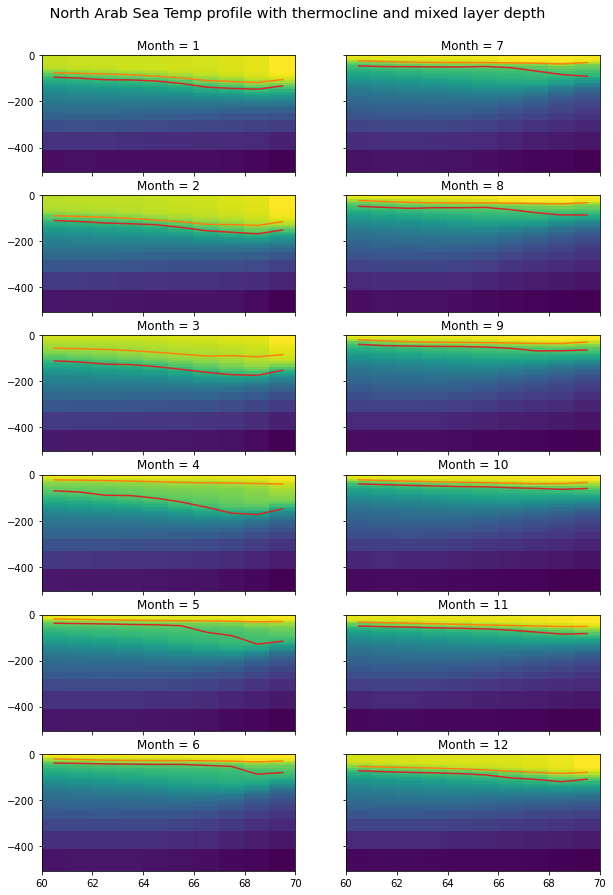

In [29]:
a = plot_t_prof_trans(T_clim, TCM, MC, 20,5,60,10,  ' North Arab Sea Temp profile with thermocline and mixed layer depth')

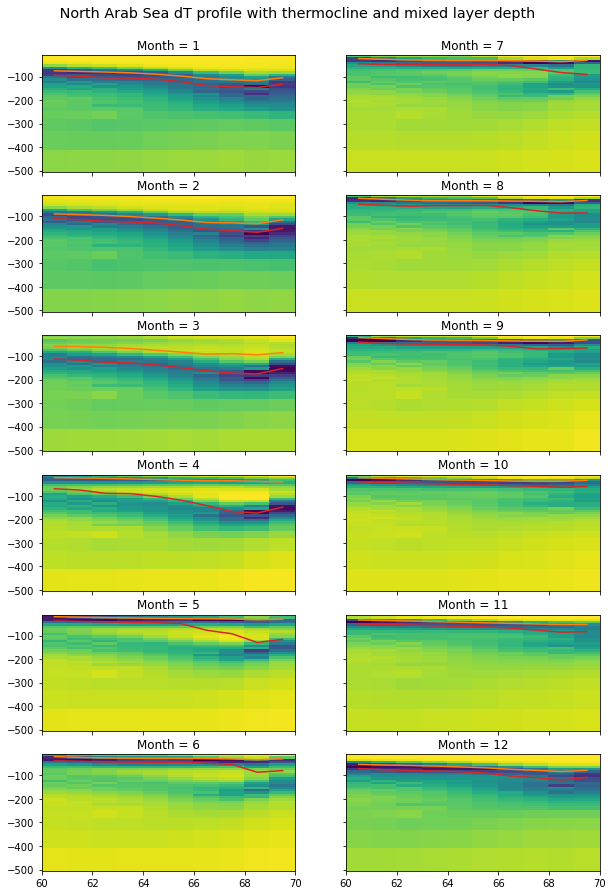

In [30]:
a = plot_t_prof_trans(dT_clim, TCM, MC, 20,5,60,10,  ' North Arab Sea dT profile with thermocline and mixed layer depth')

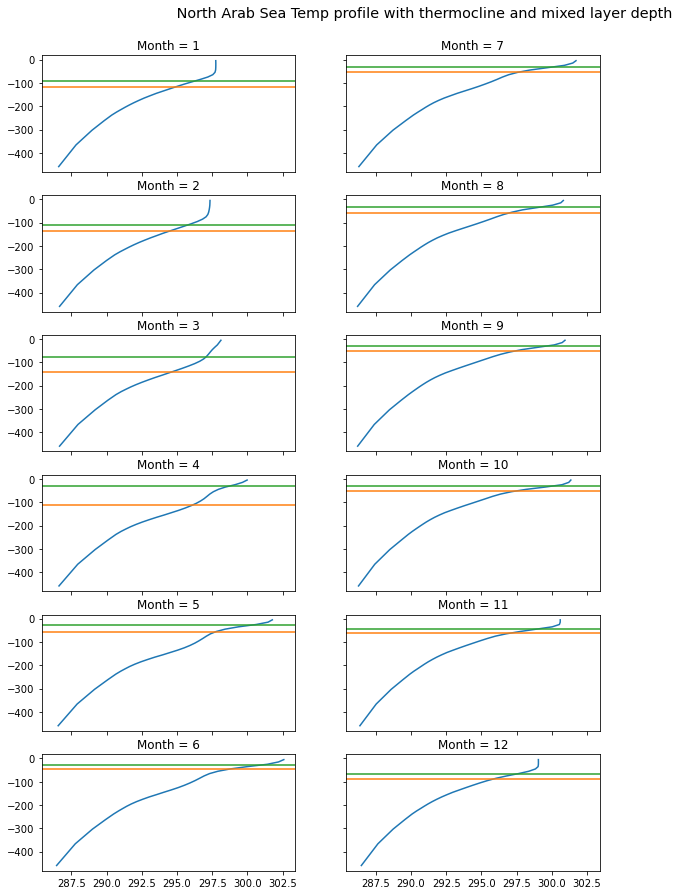

In [31]:
a = plot_t_prof(T_clim, TCM, MC, 20,5,60,10,  ' North Arab Sea Temp profile with thermocline and mixed layer depth')

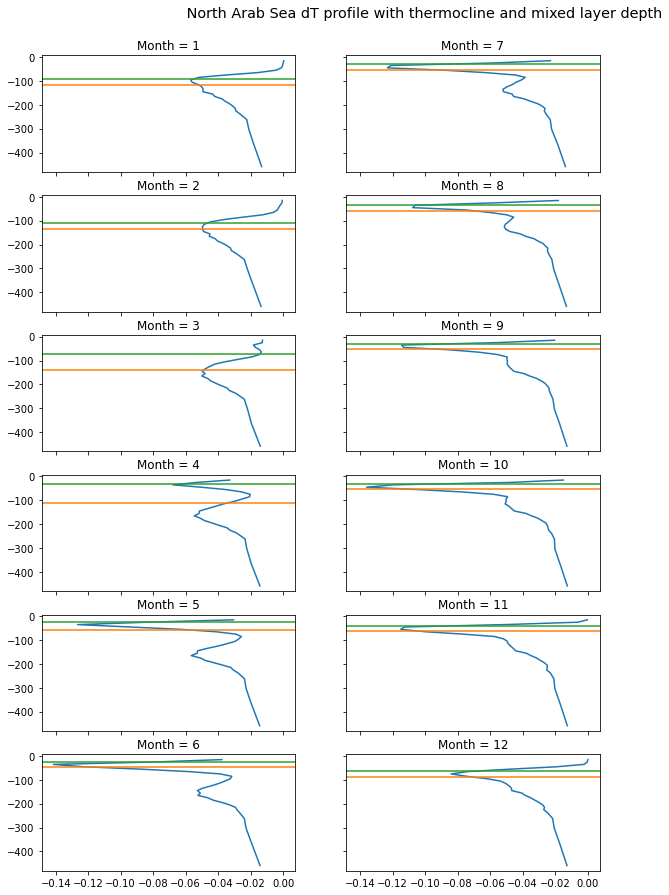

In [32]:
a = plot_t_prof(dT_clim, TCM, MC, 20,5,60,10,  ' North Arab Sea dT profile with thermocline and mixed layer depth')

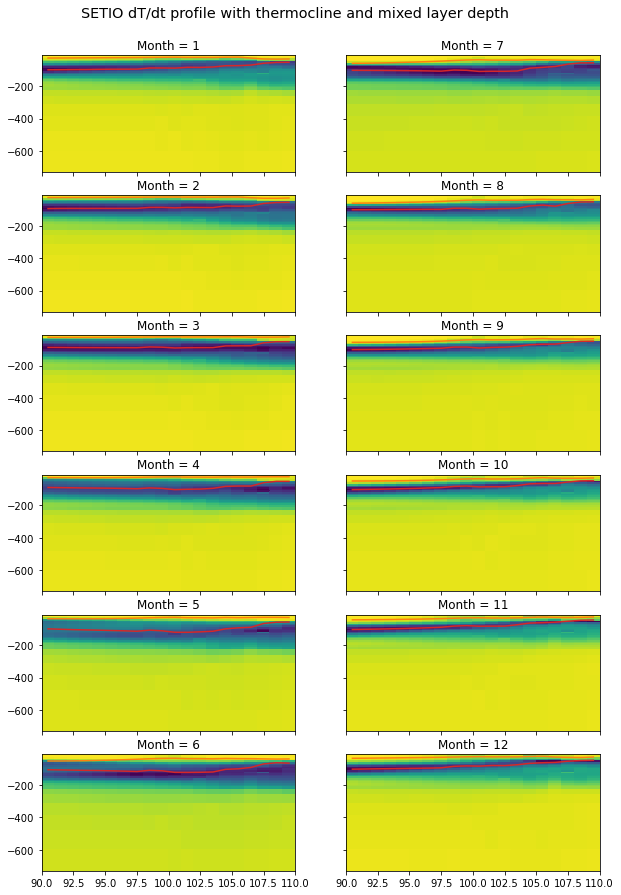

In [71]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -10, 10, 90, 20,  'SETIO dT/dt profile with thermocline and mixed layer depth')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

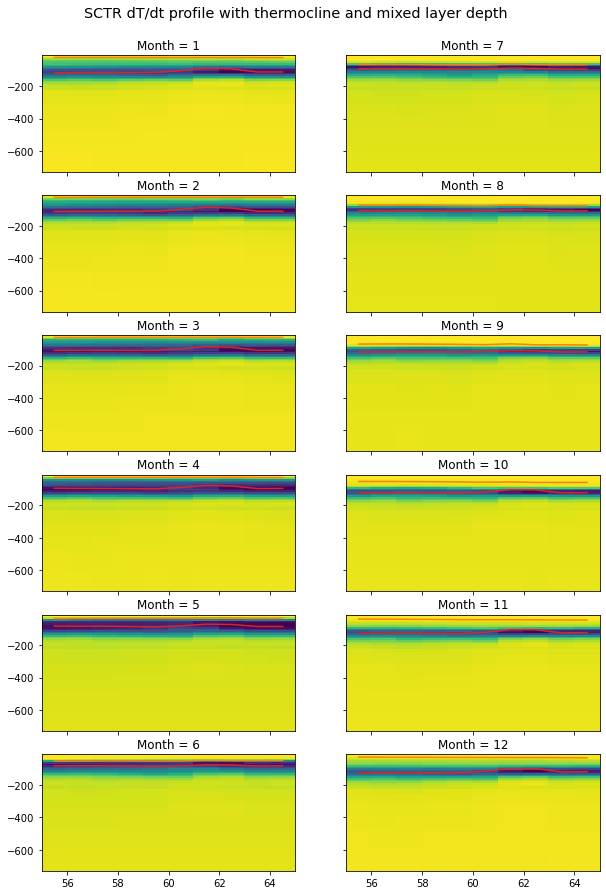

In [68]:
a = plot_t_prof_trans(dT_clim, TCM, MC, -12, 7, 55, 10,  'SCTR dT/dt profile with thermocline and mixed layer depth')

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

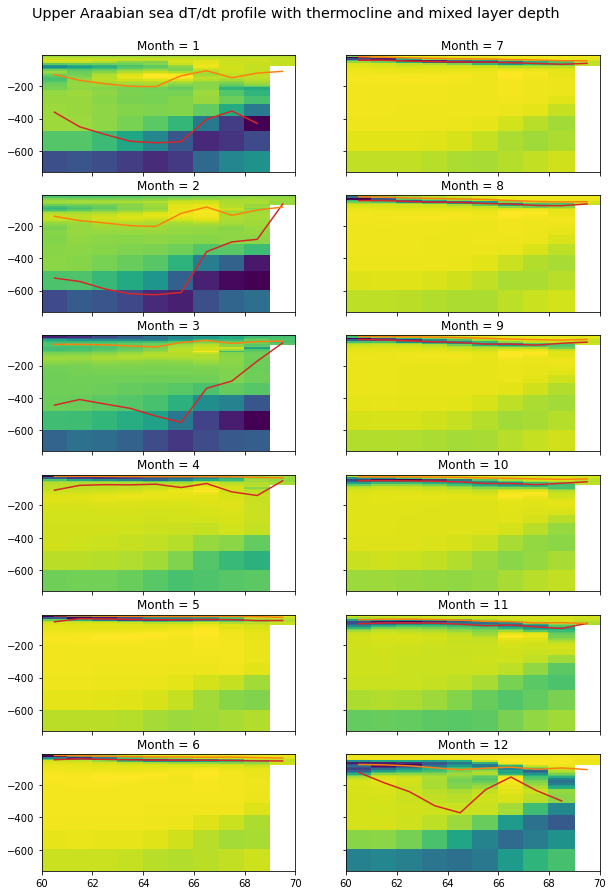

In [69]:
a = plot_t_prof_trans(dT_clim, TCM, MC, 20, 7, 60, 10,  'Upper Araabian sea dT/dt profile with thermocline and mixed layer depth')

In [64]:
for i in range(0,6):
    print (i, i+6)

0 6
1 7
2 8
3 9
4 10
5 11


/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

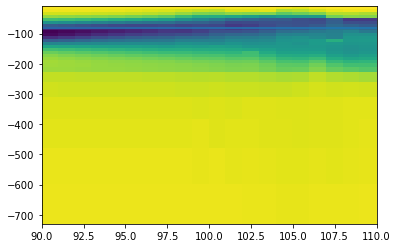

In [50]:
plt.pcolormesh(T_R[0].lon, T_R[0].level*-1, T_R[0], shading = 'auto')
plt.axhline(y = -1*SETIO_C[0])

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.

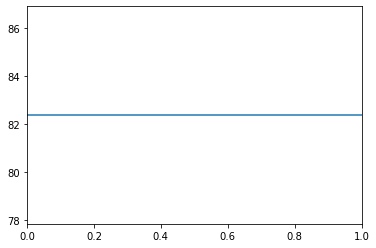

In [48]:
plt.axhline(y = SETIO_C[0])

/home/z5113258/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


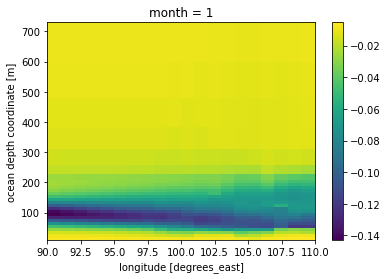

In [39]:
T_R[0].plot()

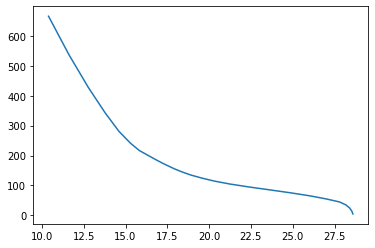

In [129]:
plt.plot(SETIO_T[0], SETIO_T.level)
   axes[i, 0].axhline(y = T_C, c = 'tab:orange')
        axes[i, 0].axhline(y = T_M, c = 'tab:green')  

In [98]:
#plotting depth lattiuyde profile for latitude at time 300 here
#-12, 7, 55, 10
SIO_L = T.sel(lat=slice(20, 25),lon=slice(60, 70)).mean(['lat'])
SIO_LD = SIO_L.differentiate('level')#/(T.level.diff('level'))

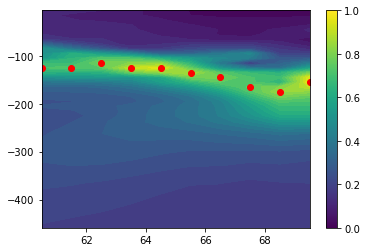

In [99]:
plt.contourf(SIO_LD.lon, SIO_LD.level*-1, SIO_LD[1]*-1, levels = 30)
plt.scatter(SIO_LD.lon, SIO_LD[1].idxmin('level')*-1, c = 'r')
plt.colorbar()

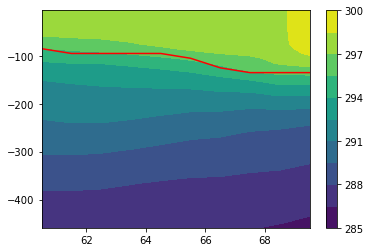

In [100]:
plt.contourf(SIO_L.lon, SIO_L.level*-1, SIO_L[0], levels = 10)
plt.plot(SIO_LD.lon, SIO_LD[0].idxmin('level')*-1, c = 'r')
plt.colorbar()

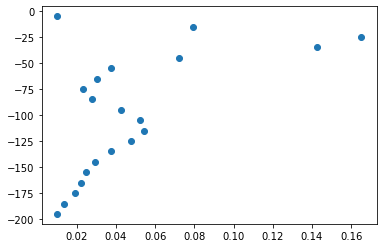

In [30]:
test = SIO_LD.mean('lon')[5]
plt.scatter(test*-1, test.level*-1)


In [73]:
arr_ = np.argmin(test.values, axis = 0)

In [74]:
arr_

2

In [79]:
test[(arr_-1):(arr_+1)].values


array([-0.07935461, -0.1651974 ], dtype=float32)

In [10]:
#get regions
def get_region(DS, lat, lat_r, lon, lon_r):
    setio = DS.sel(lat=slice(lat, lat+lat_r),lon=slice(lon, lon+lon_r)).mean(['lat', 'lon'])
    return setio

In [10]:
#get regions of interest as timeseries
SETIO = get_region(T, -10, 10, 90, 20)
WTIO = get_region(T, -10, 20, 50, 20)
SCTR = get_region(T, -12, 7, 55, 10)#55°E–65°E, 5°S–12°S
SSUM = get_region(T, -10,5,100,7)
NSUM = get_region(T, 0,5,95,5)
EQA = get_region(T, -5,5,50,30)
SIO = get_region(T, -18, 1, 53, 1)

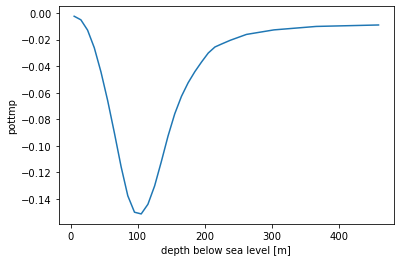

In [101]:
#now get climatology and plot 
SETIO.differentiate('level').mean('time').plot()

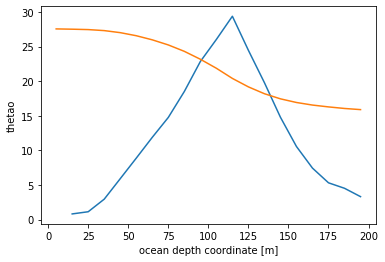

In [44]:
(-200*(SCTR.diff('level')/(SETIO.level.diff('level'))).mean('time')).plot()
SCTR.mean('time').plot()


In [53]:
(SCTR.diff('level')/(SETIO.level.diff('level'))).mean('time').idxmin().values

array(115.)

In [20]:
arr = xr.DataArray([5, 5, 6, 6], [[1, 2, 3, 4]], ["x"])

In [26]:
arr.differentiate('x')

<xarray.DataArray (x: 4)>
array([0. , 0.5, 0.5, 0. ])
Coordinates:
  * x        (x) int64 1 2 3 4

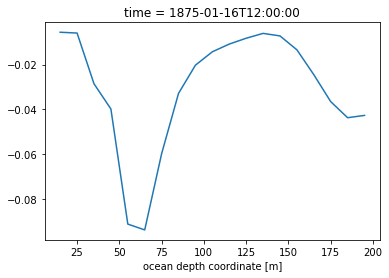

In [133]:
((SIO.diff('level')/(T.level.diff('level')))[300]).plot()

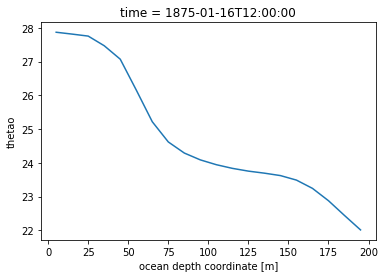

In [134]:
SIO[300].plot()

In [78]:
SIO[:,0]

<xarray.DataArray 'thetao' (time: 1980)>
dask.array<getitem, shape=(1980,), dtype=float32, chunksize=(120,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    level    float64 5.0

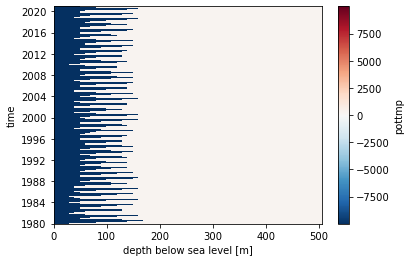

In [116]:
SIO.where(SIO<(SIO[:,0]-2), -9999).plot()

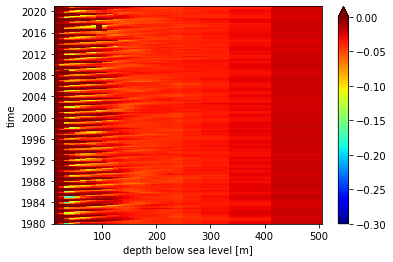

In [115]:
((SIO.diff('level')/(T.level.diff('level')))).plot(vmin = -0.3, vmax = 0, cmap = 'jet')

In [118]:
test = SIO.diff('level')/(T.level.diff('level'))

<ipython-input-126-7a344d785fbc>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(test.level[:20], test.time, test[:,:20], cmap = 'jet')


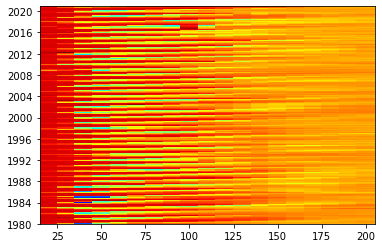

In [126]:
plt.pcolor(test.level[:20], test.time, test[:,:20], cmap = 'jet')

<ipython-input-125-0e24ffc76e6b>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(SIO.level[:20], SIO.time, SIO[:,:20])


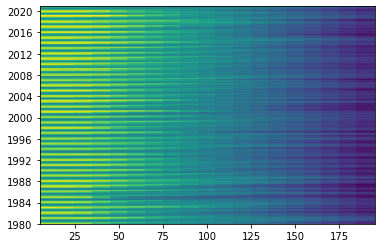

In [125]:
plt.pcolor(SIO.level[:20], SIO.time, SIO[:,:20])

In [ ]:
######
#quick way to get thermocline climatology
#climatology of temperature depth, fit spline, then get max dtdz
#get the 